# Import

In [2]:
import json
import os
import pandas as pd
import re

C:\Users\cloud\AppData\Local\Temp\ipykernel_9944\819515313.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was too old on your system - pyarrow 10.0.1 is the current minimum supported version as of this release.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
import spacy
from spacy import displacy
from spacy.tokens import Span

D:\Anaconda3\envs\nlp\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from datasets import Dataset

# Load Data

In [5]:
path_train = './in/train.json'
path_test = './in/test.json'

In [6]:
train_json = json.load(open(path_train))
df_train = pd.json_normalize(train_json)

test_json = json.load(open(path_test))
df_test = pd.json_normalize(test_json)

In [7]:
df_train.head()

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."


In [11]:
dataset = Dataset.from_pandas(df_train)

In [14]:
data = df_train[:100]
label_sequences = df_train.labels[:100]

In [24]:
import numpy as np

# Example label sequences



label_sequences = [
    [0, 1, 1, 2],
    [1, 1, 2, 2],
    [0, 1, 1, 2],
    [0, 1, 2, 2],
    [0, 1, 2, 2],
    # Add more label sequences as needed
]



data = df_train[:100].index
label_sequences = df_train.labels[:100]

# Calculate label sequence frequencies
label_sequence_counts = {}
for seq in label_sequences:
    seq_str = ','.join(map(str, seq))
    label_sequence_counts[seq_str] = label_sequence_counts.get(seq_str, 0) + 1

# Determine proportions for splitting
train_proportion = 0.7
val_proportion = 0.15
test_proportion = 0.15

# Stratified splitting
total_samples = len(label_sequences)
train_count = int(train_proportion * total_samples)
val_count = int(val_proportion * total_samples)
test_count = total_samples - train_count - val_count

label_sequence_counts = sorted(label_sequence_counts.items(), key=lambda x: x[1], reverse=True)
train_sequences = []
val_sequences = []
test_sequences = []

for seq_str, count in label_sequence_counts:
    if len(train_sequences) < train_count:
        train_sequences.extend([seq_str] * min(count, train_count - len(train_sequences)))
    elif len(val_sequences) < val_count:
        val_sequences.extend([seq_str] * min(count, val_count - len(val_sequences)))
    else:
        test_sequences.extend([seq_str] * min(count, test_count - len(test_sequences)))

# Once you have the stratified sequences, extract the corresponding entries from your dataset
# For example:
train_data = [entry for entry, seq in zip(data, label_sequences) if ','.join(map(str, seq)) in train_sequences]
val_data = [entry for entry, seq in zip(data, label_sequences) if ','.join(map(str, seq)) in val_sequences]
test_data = [entry for entry, seq in zip(data, label_sequences) if ','.join(map(str, seq)) in test_sequences]

In [27]:
val_data

[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]

In [28]:
test_data

[85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

In [26]:
train_data

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69]

In [12]:
dataset.train_test_split(test_size=0.12, stratify_by_column="labels", seed=42)

ValueError: Stratifying by column is only supported for ClassLabel column, and column labels is Sequence.

# Stats

In [7]:
print (f'Number of train records: {len(df_train)}')
print (f'Number of test records: {len(df_test)}')

Number of train records: 6807
Number of test records: 10


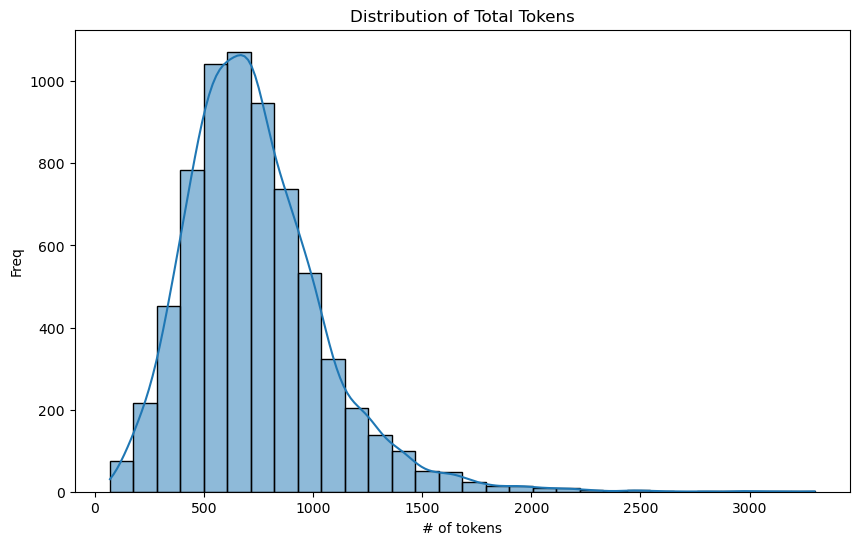

In [8]:
df_train['total_tokens'] = df_train['tokens'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df_train['total_tokens'], bins=30, kde=True)
plt.title('Distribution of Total Tokens')
plt.xlabel('# of tokens')
plt.ylabel('Freq')
plt.show()

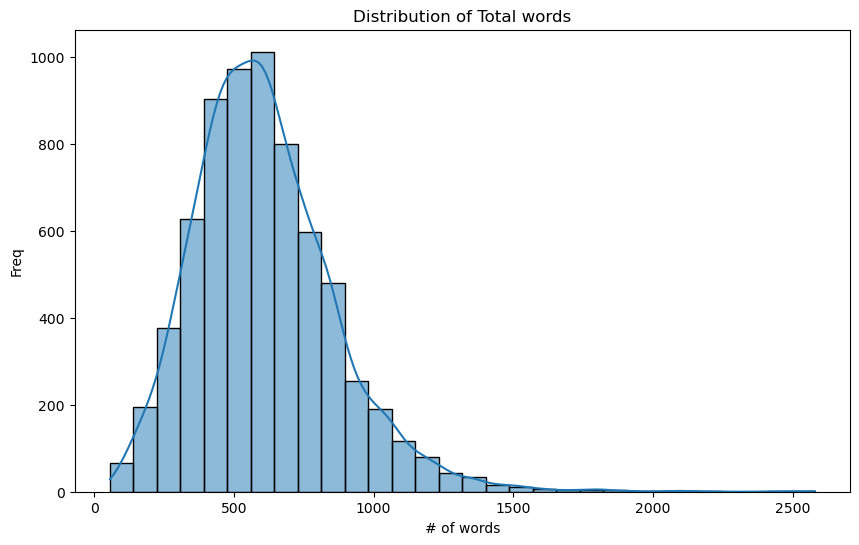

In [9]:
df_train['word_count'] = df_train['full_text'].apply(lambda x: len(x.split()))
df_train['char_count'] = df_train['full_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df_train['word_count'], bins=30, kde=True)
plt.title('Distribution of Total words')
plt.xlabel('# of words')
plt.ylabel('Freq')
plt.show()

In [10]:
df_train.sort_values(['word_count'])

,document,full_text,tokens,trailing_whitespace,labels,total_tokens,word_count,char_count
2713,13147,Think Twice and Make a Wise\n\nConcept Mapping...,"[Think, Twice, and, Make, a, Wise, \n\n, Conce...","[True, True, True, True, True, False, False, T...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",69,57,354
5402,19614,Who are your target customers?\n\nPatients hav...,"[Who, are, your, target, customers, ?, \n\n, P...","[True, True, True, True, False, False, False, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",71,58,325
5966,20900,Mind Mapping selection:\n\nMind mapping is us...,"[Mind, Mapping, , selection, :, \n\n, Mind, m...","[True, True, False, False, False, False, True,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",88,64,455
5098,18959,Reflection writing rubric it represents throug...,"[Reflection, writing, rubric, it, represents, ...","[True, True, True, True, True, True, False, Tr...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",85,71,424
2231,12140,Summary of etiquette and manners in conversati...,"[Summary, of, etiquette, and, manners, in, con...","[True, True, True, True, True, True, False, Fa...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",111,73,465
...,...,...,...,...,...,...,...,...
781,9188,Design Thinking in Career Development and Coun...,"[Design, Thinking, in, Career, Development, an...","[True, True, True, True, True, True, True, Fal...","[O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-NAM...",2781,2110,13558
473,7745,Luis Gonzales Savitribai Phule Pune Universit...,"[Luis, Gonzales, , Savitribai, Phule, Pune, U...","[True, True, False, True, True, True, True, Fa...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...",2622,2190,12784
1207,10078,Overcoming Barriers - The Story of the Movie a...,"[Overcoming, Barriers, -, The, Story, of, the,...","[True, True, True, True, True, True, True, Tru...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",2956,2443,15301
3175,14267,"MIAMISBURG, Ohio, Dec. 10, 2019 /PRNewswire/ -...","[MIAMISBURG, ,, Ohio, ,, Dec., 10, ,, 2019, /P...","[False, True, False, True, True, False, True, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",3133,2528,16570


In [11]:
sample_labels = []
for i in train_json:
    sample_labels.extend(i['labels'])
    
sample_labels = sorted(set(sample_labels))
sample_labels.remove('O')

for i in sample_labels:
    print (i)

B-EMAIL
B-ID_NUM
B-NAME_STUDENT
B-PHONE_NUM
B-STREET_ADDRESS
B-URL_PERSONAL
B-USERNAME
I-ID_NUM
I-NAME_STUDENT
I-PHONE_NUM
I-STREET_ADDRESS
I-URL_PERSONAL


# Visualize Sample

In [93]:
def visualize_span(record):
    
    global span_infos
    
    start_pos = -1
    span_infos = []
    for label_index, label in enumerate(record['labels']):
        if re.match('^B-', label):
            start_pos = label_index
            label_group = label.split('-')[1]

        if re.match('O', label) and start_pos != -1:
            end_pos = label_index
            span_dict = {'start_pos':start_pos, 'end_pos':end_pos, 'label_group':label_group}
            span_infos.append(span_dict)
            start_pos = -1

    doc_spans = []
    nlp = spacy.blank('en')
    doc = nlp(record['full_text'])
    for span_info in span_infos:
        _span = Span(doc, span_info['start_pos'], span_info['end_pos'], span_info['label_group'])
        doc_spans.append(_span)

    doc.spans['sc'] = doc_spans

    displacy.render(doc, style = 'span')

In [102]:
type(doc_spans[0])

spacy.tokens.span.Span

In [104]:
record = train_json[1951]

doc_spans = []
nlp = spacy.blank('en')
doc = nlp(record['full_text'])
for span_info in span_infos:
    _span = Span(doc, span_info['start_pos'], span_info['end_pos'], span_info['label_group'])
    doc_spans.append(_span)

doc.spans['sc'] = doc_spans

displacy.render(doc, style = 'span')

In [90]:
doc_spans

NameError: name 'doc_spans' is not defined

In [94]:
visualize_span(train_json[1951])

In [20]:
%%time
def get_label_group(x):
    if x == 'O':
        return 'O'
    else:
        y = x.split('-')[1]
        return y

record_list = []
for index, record in df_train.iterrows():
    for label_index, label in enumerate(record['labels']):
        record_tuple = (record['document'], label_index, label, record['tokens'][label_index])
        record_list.append(record_tuple)
        
df_tokens = pd.DataFrame(data = record_list, columns = ['document', 'token_index', 'label', 'token'])
df_tokens['label_group'] = df_tokens['label'].apply(get_label_group)

CPU times: total: 55.2 s
Wall time: 55.9 s


In [88]:
df_tokens

,tokens,trailing_whitespace,labels,label_group
0,Design,True,O,O
1,Thinking,True,O,O
2,for,True,O,O
3,innovation,True,O,O
4,reflexion,False,O,O
...,...,...,...,...
4992528,process,True,O,O
4992529,explained,True,O,O
4992530,above,False,O,O
4992531,.,False,O,O


# Tokens View

In [13]:
df_train.head()

,document,full_text,tokens,trailing_whitespace,labels,total_tokens,word_count,char_count
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...",753,596,3709
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...",563,475,2915
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...",729,622,3792
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...",1071,909,5158
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST...",1927,923,5741


In [20]:
%%time
df_train['token_index'] = df_train['tokens'].apply(lambda x: list(range(len(x))))

# Explode the lists in each column, keep track of the original index and list index values
df_tokens = df_train.drop(columns=['full_text']).apply(lambda col: col.explode()).reset_index(drop=True)
df_tokens


def get_label_group(x):
    if x == 'O':
        return 'O'
    else:
        y = x.split('-')[1]
        return y

df_tokens['label_group'] = df_tokens['labels'].apply(get_label_group)

CPU times: total: 4.12 s
Wall time: 4.31 s


In [21]:
def get_label_group(x):
    if x == 'O':
        return 'O'
    else:
        y = x.split('-')[1]
        return y

df_tokens['label_group'] = df_tokens['labels'].apply(get_label_group)

In [22]:
df_tokens[df_tokens.label_group != 'O']

,document,tokens,trailing_whitespace,labels,total_tokens,word_count,char_count,token_index,label_group
9,7,Nathalie,True,B-NAME_STUDENT,753,596,3709,9,NAME_STUDENT
10,7,Sylla,False,I-NAME_STUDENT,753,596,3709,10,NAME_STUDENT
482,7,Nathalie,True,B-NAME_STUDENT,753,596,3709,482,NAME_STUDENT
483,7,Sylla,False,I-NAME_STUDENT,753,596,3709,483,NAME_STUDENT
741,7,Nathalie,True,B-NAME_STUDENT,753,596,3709,741,NAME_STUDENT
...,...,...,...,...,...,...,...,...,...
2840591,15717,IV-8322,True,B-ID_NUM,1377,1103,6794,365,ID_NUM
2841190,15717,IV-8322,True,B-ID_NUM,1377,1103,6794,964,ID_NUM
3889614,19280,Z.S.,True,B-ID_NUM,860,766,4784,54,ID_NUM
3889615,19280,30407059,False,I-ID_NUM,860,766,4784,55,ID_NUM


In [23]:
df_tokens.labels.value_counts()

labels
O                   4989794
B-NAME_STUDENT         1365
I-NAME_STUDENT         1096
B-URL_PERSONAL          110
B-ID_NUM                 78
B-EMAIL                  39
I-STREET_ADDRESS         20
I-PHONE_NUM              15
B-USERNAME                6
B-PHONE_NUM               6
B-STREET_ADDRESS          2
I-URL_PERSONAL            1
I-ID_NUM                  1
Name: count, dtype: int64

In [24]:
df_tokens.label_group.value_counts()

label_group
O                 4989794
NAME_STUDENT         2461
URL_PERSONAL          111
ID_NUM                 79
EMAIL                  39
STREET_ADDRESS         22
PHONE_NUM              21
USERNAME                6
Name: count, dtype: int64

## NAME_STUDENT

In [25]:
_label_group = 'NAME_STUDENT'
print(f'Label Group: {_label_group}')
print(f"Number of records: {df_tokens.loc[df_tokens['label_group'] == _label_group].shape[0]}")
df_tokens.loc[df_tokens['label_group'] == _label_group]

Label Group: NAME_STUDENT
Number of records: 2461


,document,tokens,trailing_whitespace,labels,total_tokens,word_count,char_count,token_index,label_group
9,7,Nathalie,True,B-NAME_STUDENT,753,596,3709,9,NAME_STUDENT
10,7,Sylla,False,I-NAME_STUDENT,753,596,3709,10,NAME_STUDENT
482,7,Nathalie,True,B-NAME_STUDENT,753,596,3709,482,NAME_STUDENT
483,7,Sylla,False,I-NAME_STUDENT,753,596,3709,483,NAME_STUDENT
741,7,Nathalie,True,B-NAME_STUDENT,753,596,3709,741,NAME_STUDENT
...,...,...,...,...,...,...,...,...,...
2144558,13336,Cervantes,False,I-NAME_STUDENT,1301,1022,6777,3,NAME_STUDENT
2148190,13342,Carlos,True,B-NAME_STUDENT,593,502,2974,0,NAME_STUDENT
2148191,13342,Hernandez,False,I-NAME_STUDENT,593,502,2974,1,NAME_STUDENT
2148713,13342,Carlos,True,B-NAME_STUDENT,593,502,2974,523,NAME_STUDENT


## URL_PERSONAL         

In [27]:
_label_group = 'URL_PERSONAL'
print(f'Label Group: {_label_group}')
print(f"Number of records: {df_tokens.loc[df_tokens['label_group'] == _label_group].shape[0]}")
df_tokens.loc[df_tokens['label_group'] == _label_group]

Label Group: URL_PERSONAL
Number of records: 111


,document,tokens,trailing_whitespace,labels,total_tokens,word_count,char_count,token_index,label_group
15979,317,https://www.jackson.com/list/explorehomepage.htm,False,B-URL_PERSONAL,814,648,4037,611,URL_PERSONAL
20981,379,https://www.linkedin.com/in/mmartinez,True,B-URL_PERSONAL,766,644,4244,31,URL_PERSONAL
23325,472,https://youtu.be/rFD2lJuvace,True,B-URL_PERSONAL,1055,850,5607,922,URL_PERSONAL
39858,1309,https://www.hall.biz/wp-contenthome.html,False,B-URL_PERSONAL,855,705,4463,497,URL_PERSONAL
55536,1798,http://www.burns-lopez.com/categories/appabout...,False,B-URL_PERSONAL,294,220,1663,292,URL_PERSONAL
...,...,...,...,...,...,...,...,...,...
2060807,13103,https://hernandez.com/exploremain.html,True,B-URL_PERSONAL,1050,825,5220,455,URL_PERSONAL
2060809,13103,https://www.roman.info/list/appindex.html,True,B-URL_PERSONAL,1050,825,5220,457,URL_PERSONAL
2061001,13103,https://hernandez.com/exploremain.html,False,B-URL_PERSONAL,1050,825,5220,649,URL_PERSONAL
2061003,13103,https://www.roman.info/list/appindex.html,False,B-URL_PERSONAL,1050,825,5220,651,URL_PERSONAL


## ID_NUM

In [79]:
_label_group = 'ID_NUM'
print(f'Label Group: {_label_group}')
print(f"Number of records: {df_tokens.loc[df_tokens['label_group'] == _label_group].shape[0]}")
df_tokens.loc[df_tokens['label_group'] == _label_group]

Label Group: NAME_STUDENT
Number of records: 2461


,tokens,trailing_whitespace,labels,label_group
9,Nathalie,True,B-NAME_STUDENT,NAME_STUDENT
10,Sylla,False,I-NAME_STUDENT,NAME_STUDENT
482,Nathalie,True,B-NAME_STUDENT,NAME_STUDENT
483,Sylla,False,I-NAME_STUDENT,NAME_STUDENT
741,Nathalie,True,B-NAME_STUDENT,NAME_STUDENT
...,...,...,...,...
2144558,Cervantes,False,I-NAME_STUDENT,NAME_STUDENT
2148190,Carlos,True,B-NAME_STUDENT,NAME_STUDENT
2148191,Hernandez,False,I-NAME_STUDENT,NAME_STUDENT
2148713,Carlos,True,B-NAME_STUDENT,NAME_STUDENT


## EMAIL

In [82]:
_label_group = 'EMAIL'
print(f'Label Group: {_label_group}')
print(f"Number of records: {df_tokens.loc[df_tokens['label_group'] == _label_group].shape[0]}")
df_tokens.loc[df_tokens['label_group'] == _label_group]

Label Group: EMAIL
Number of records: 39


,tokens,trailing_whitespace,labels,label_group
20978,djones@gmail.com,True,B-EMAIL,EMAIL
71156,matthew72@hotmail.com,False,B-EMAIL,EMAIL
106633,belindarojas@yahoo.com,True,B-EMAIL,EMAIL
106635,kennethevans@hotmail.com,False,B-EMAIL,EMAIL
138705,agood@gmail.com,False,B-EMAIL,EMAIL
139228,agood@gmail.com,False,B-EMAIL,EMAIL
150914,hwillis@gmail.com,True,B-EMAIL,EMAIL
156553,kellyharrison@gmail.com,True,B-EMAIL,EMAIL
157119,kellyharrison@gmail.com,True,B-EMAIL,EMAIL
160579,lowetyler@hotmail.com,False,B-EMAIL,EMAIL


## STREET_ADDRESS

In [83]:
_label_group = 'STREET_ADDRESS'
print(f'Label Group: {_label_group}')
print(f"Number of records: {df_tokens.loc[df_tokens['label_group'] == _label_group].shape[0]}")
df_tokens.loc[df_tokens['label_group'] == _label_group]

Label Group: STREET_ADDRESS
Number of records: 22


,tokens,trailing_whitespace,labels,label_group
861199,591,True,B-STREET_ADDRESS,STREET_ADDRESS
861200,Smith,True,I-STREET_ADDRESS,STREET_ADDRESS
861201,Centers,True,I-STREET_ADDRESS,STREET_ADDRESS
861202,Apt,False,I-STREET_ADDRESS,STREET_ADDRESS
861203,.,True,I-STREET_ADDRESS,STREET_ADDRESS
861204,656,False,I-STREET_ADDRESS,STREET_ADDRESS
861205,\n,False,I-STREET_ADDRESS,STREET_ADDRESS
861206,Joshuamouth,False,I-STREET_ADDRESS,STREET_ADDRESS
861207,",",True,I-STREET_ADDRESS,STREET_ADDRESS
861208,RI,True,I-STREET_ADDRESS,STREET_ADDRESS


## PHONE_NUM

In [85]:
_label_group = 'PHONE_NUM'
print(f'Label Group: {_label_group}')
print(f"Number of records: {df_tokens.loc[df_tokens['label_group'] == _label_group].shape[0]}")
df_tokens.loc[df_tokens['label_group'] == _label_group]

Label Group: PHONE_NUM
Number of records: 21


,tokens,trailing_whitespace,labels,label_group
150909,(,False,B-PHONE_NUM,PHONE_NUM
150910,320)202,False,I-PHONE_NUM,PHONE_NUM
150911,-,False,I-PHONE_NUM,PHONE_NUM
150912,0688x95843,True,I-PHONE_NUM,PHONE_NUM
179880,(,False,B-PHONE_NUM,PHONE_NUM
179881,223)392,False,I-PHONE_NUM,PHONE_NUM
179882,-,False,I-PHONE_NUM,PHONE_NUM
179883,2765,False,I-PHONE_NUM,PHONE_NUM
286835,(,False,B-PHONE_NUM,PHONE_NUM
286836,820)913,False,I-PHONE_NUM,PHONE_NUM


## USERNAME

In [87]:
_label_group = 'USERNAME'
print(f'Label Group: {_label_group}')
print(f"Number of records: {df_tokens.loc[df_tokens['label_group'] == _label_group].shape[0]}")
df_tokens.loc[df_tokens['label_group'] == _label_group]

Label Group: USERNAME
Number of records: 6


,tokens,trailing_whitespace,labels,label_group
89856,castanedagabriel,True,B-USERNAME,USERNAME
158745,fdixon,True,B-USERNAME,USERNAME
159323,fdixon,True,B-USERNAME,USERNAME
248702,meyermichelle,False,B-USERNAME,USERNAME
393816,jacob59,False,B-USERNAME,USERNAME
451756,holmespatrick,False,B-USERNAME,USERNAME
